In [2]:
# import libraries
import pandas as pd
import tensorflow as tf

In [38]:
# get dataset from csv
df = pd.read_csv('data.csv')
# df = df.head(100)
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [74]:
df.shape

(1000, 15)

In [75]:
#drop unnessossory colomns
df = df.drop(['CommentId' , 'VideoId'], axis=1)

In [76]:
df.shape

(1000, 13)

In [77]:
# display colomn counts
for c in df.columns[3:]:
    print ("---- %s ---" % c)
    print (df[c].value_counts())


---- IsThreat ---
False    979
True      21
Name: IsThreat, dtype: int64
---- IsProvocative ---
False    839
True     161
Name: IsProvocative, dtype: int64
---- IsObscene ---
False    900
True     100
Name: IsObscene, dtype: int64
---- IsHatespeech ---
False    862
True     138
Name: IsHatespeech, dtype: int64
---- IsRacist ---
False    875
True     125
Name: IsRacist, dtype: int64
---- IsNationalist ---
False    992
True       8
Name: IsNationalist, dtype: int64
---- IsSexist ---
False    999
True       1
Name: IsSexist, dtype: int64
---- IsHomophobic ---
False    1000
Name: IsHomophobic, dtype: int64
---- IsReligiousHate ---
False    988
True      12
Name: IsReligiousHate, dtype: int64
---- IsRadicalism ---
False    1000
Name: IsRadicalism, dtype: int64


In [78]:
#check is there any null values
miss=df.isnull()
miss.sum()

Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [79]:
import matplotlib.pyplot as plt

In [80]:
correlation_matrix = df.corr()

/var/folders/vm/2psvd6q52l7_2t27bl_kd7kr0000gn/T/ipykernel_11489/4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


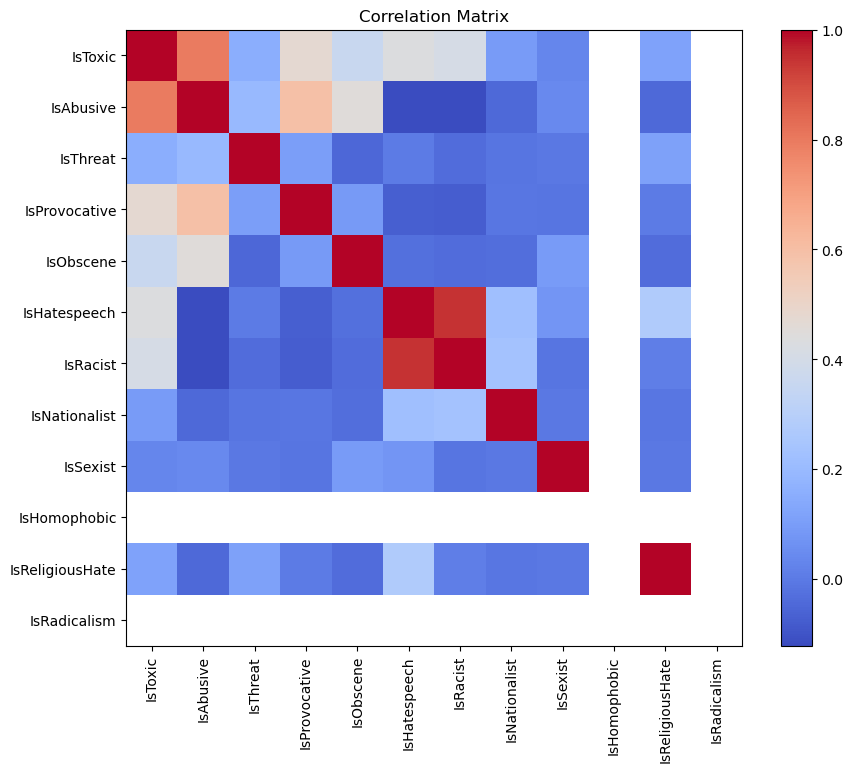

In [81]:
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

In [82]:
correlation_matrix

,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
IsToxic,1.000000,0.797086,0.158048,0.472718,0.359707,0.431774,0.407869,0.096908,0.034142,NaN,0.118928,NaN
IsAbusive,0.797086,1.000000,0.198282,0.593057,0.451277,-0.119603,-0.121005,-0.042843,0.042833,NaN,-0.042970,NaN
IsThreat,0.158048,0.198282,1.000000,0.106626,-0.048820,0.002063,-0.034268,-0.013152,-0.004634,NaN,0.111962,NaN
IsProvocative,0.472718,0.593057,0.106626,1.000000,0.089788,-0.072719,-0.075072,-0.008796,-0.013860,NaN,0.001699,NaN
IsObscene,0.359707,0.451277,-0.048820,0.089788,1.000000,-0.027061,-0.035277,-0.029934,0.094916,NaN,-0.036736,NaN
IsHatespeech,0.431774,-0.119603,0.002063,-0.072719,-0.027061,1.000000,0.944637,0.224442,0.079074,NaN,0.275440,NaN
IsRacist,0.407869,-0.121005,-0.034268,-0.075072,-0.035277,0.944637,1.000000,0.237595,-0.011958,NaN,0.013885,NaN
IsNationalist,0.096908,-0.042843,-0.013152,-0.008796,-0.029934,0.224442,0.237595,1.000000,-0.002841,NaN,-0.009897,NaN
IsSexist,0.034142,0.042833,-0.004634,-0.013860,0.094916,0.079074,-0.011958,-0.002841,1.000000,NaN,-0.003487,NaN
IsHomophobic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df=df.drop(['IsHomophobic' , 'IsRadicalism'] , axis=1)

In [84]:
df.head()

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsReligiousHate
0,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False
1,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False
2,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False
3,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False
4,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False


In [85]:
# extract features and target variables
X = df['Text'] #features
Y = df[df.columns[1:]] # target variables

In [86]:
# import Natural Language Toolkit to check and determine comment qualiry
# download and impport words library from nltk
import nltk
nltk.download('words')
from nltk.corpus import words

[nltk_data] Downloading package words to /Users/mudara/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [87]:
# define a function to check a comment words is english or not
def get_english_word_rate(row):
    row_words = row.Text.lower().split()
    word_count = len(row_words)
    english_words = 0
    for w in row_words:
        if w in words.words():
            english_words += 1
    return english_words / word_count

In [89]:
# call and add percentage row by row
df['english_word_rate'] = df.apply(get_english_word_rate,axis=1)

In [90]:
# show data
df.head()

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsReligiousHate,english_word_rate
0,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,0.846690
1,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,0.840000
2,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,0.740260
3,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,0.822430
4,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,0.744681


In [91]:
# Remove if a comment does not have 50% of english words
df2 = df[df['english_word_rate'] > 0.5]
# remove additional added colomn english_word_rate
df2 = df2.drop("english_word_rate" , axis=1)

In [92]:
# save preprocessod data
df2.to_pickle('preprocessod_data.pkl')

In [3]:
df_new = pd.read_pickle('preprocessod_data.pkl')

In [4]:
df_new.head()

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsReligiousHate
0,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False
1,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False
2,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False
3,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False
4,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False


In [5]:
df_new.shape

(898, 11)

In [7]:
data_new = df_new.drop('Text' , axis=1)# Create copy of DataFrame
data_new = data_new.astype(int) # Transform all columns to integer
data = df_new['Text']
df_new = pd.concat([data , data_new] , axis=1)
df_new.head()

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsReligiousHate
0,If only people would just take a step back and...,0,0,0,0,0,0,0,0,0,0
1,Law enforcement is not trained to shoot to app...,1,1,0,0,0,0,0,0,0,0
2,\nDont you reckon them 'black lives matter' ba...,1,1,0,0,1,0,0,0,0,0
3,There are a very large number of people who do...,0,0,0,0,0,0,0,0,0,0
4,"The Arab dude is absolutely right, he should h...",0,0,0,0,0,0,0,0,0,0


In [8]:
# extract features and target variables
X = df_new['Text'] #features
Y = df_new[df_new.columns[1:]] # target variables

In [9]:
X.head()

0    If only people would just take a step back and...
1    Law enforcement is not trained to shoot to app...
2    \nDont you reckon them 'black lives matter' ba...
3    There are a very large number of people who do...
4    The Arab dude is absolutely right, he should h...
Name: Text, dtype: object

In [10]:
Y.shape

(898, 10)

In [11]:
# insert TextVectorization to tokanized the featured
from tensorflow.keras.layers import TextVectorization

In [12]:
ALL_WORDS = 200000 # define max number of words in vectorizer
MAX_WORDS = 2000 # define max words in per comment

In [13]:
#initialize the vectorizer
vectorizer = TextVectorization(max_tokens=ALL_WORDS,
                               output_sequence_length=MAX_WORDS,
                               output_mode='int')

In [14]:
# fed our words to vectorizer and teach  as numpy array
vectorizer.adapt(X.values)

2023-05-24 17:38:42.683631: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [15]:
# save the vectorized values to dataframe
vectorized_text = vectorizer(X.values)

In [16]:
# chech whether vectorized or not
vectorized_text

<tf.Tensor: shape=(898, 2000), dtype=int64, numpy=
array([[  25,   82,   18, ...,    0,    0,    0],
       [ 166,  444,    7, ...,    0,    0,    0],
       [  55,    9, 2862, ...,    0,    0,    0],
       ...,
       [   2, 1138,   64, ...,    0,    0,    0],
       [  12,   73,    7, ...,    0,    0,    0],
       [ 235,    2, 3248, ...,    0,    0,    0]])>

In [17]:
Y.dtypes

IsToxic            int64
IsAbusive          int64
IsThreat           int64
IsProvocative      int64
IsObscene          int64
IsHatespeech       int64
IsRacist           int64
IsNationalist      int64
IsSexist           int64
IsReligiousHate    int64
dtype: object

In [18]:
# create tensorflow TensorSliceDataset
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, Y))

dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(1)
dataset = dataset.prefetch(8) # helps bottlenecks

In [19]:
# divide into train vaidate and test
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [20]:
# checkk the divided data
train_generator = train.as_numpy_iterator ()

In [21]:
train_generator .next ()

(array([[ 11, 245,   5, ...,   0,   0,   0]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

In [22]:
print("train" , len(train))
print("val" ,len(val))
print("test" ,len(test))

train 628
val 179
test 89


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [24]:
model = Sequential()
# Create the input layer 
model.add(Embedding(ALL_WORDS+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(10, activation='sigmoid'))

In [25]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [26]:
# summery of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 512)               33280     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                        

In [27]:
# train the created model
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
628/628 [==============================] - 212s 335ms/step - loss: 0.3369 - val_loss: 0.3318
Epoch 2/10
628/628 [==============================] - 211s 336ms/step - loss: 0.3115 - val_loss: 0.2699
Epoch 3/10
628/628 [==============================] - 229s 364ms/step - loss: 0.2546 - val_loss: 0.2038
Epoch 4/10
628/628 [==============================] - 212s 337ms/step - loss: 0.2077 - val_loss: 0.1876
Epoch 5/10
628/628 [==============================] - 216s 344ms/step - loss: 0.1722 - val_loss: 0.1345
Epoch 6/10
628/628 [==============================] - 213s 339ms/step - loss: 0.1579 - val_loss: 0.1574
Epoch 7/10
628/628 [==============================] - 213s 340ms/step - loss: 0.1334 - val_loss: 0.1124
Epoch 8/10
628/628 [==============================] - 212s 337ms/step - loss: 0.1095 - val_loss: 0.0922
Epoch 9/10
628/628 [==============================] - 212s 337ms/step - loss: 0.0935 - val_loss: 0.0907
Epoch 10/10
628/628 [==============================] - 212s 338m

In [28]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [30]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 42ms/step


In [31]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9200000166893005, Recall:0.8679245114326477, Accuracy:0.7415730357170105


In [32]:
model.save("comment_classificatio.h5")

In [33]:
model = tf.keras.models.load_model('comment_classificatio.h5')

In [34]:
input_str = vectorizer('I am going to it you')

In [35]:

import numpy as np
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 0s 335ms/step


In [37]:
for i, c in enumerate(df_new.columns[3:]):
    print("----", c, "----")
    print(res[0,i])

---- IsThreat ----
0.9999438
---- IsProvocative ----
0.99987644
---- IsObscene ----
0.01612318
---- IsHatespeech ----
0.548217
---- IsRacist ----
0.0846282
---- IsNationalist ----
0.00023261407
---- IsSexist ----
0.00028774102
---- IsReligiousHate ----
3.4969457e-08
